<a href="https://colab.research.google.com/github/wmazza-br/wmazza-br/blob/main/Job_13_Exemplo_de_Aplica%C3%A7%C3%A3o_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='blue' style='font-size: 30px;'>Avaliação de Despesas Governamentais</font>

##<font color='blue' style='font-size: 30px;'>1.   Problema de negócio</font>

Auxiliar o governo federal na detecção de possíveis fraudes em seus processos de pagamentos, no período de Janeiro a Abril de 2022, por meio de poderosas ferramentas de inteligência artificial e ciência de dados.

<hr></hr>

##<font color='blue' style='font-size: 30px;'>2.   Origem dos dados</font>

*   Fonte da base de dados: Portal da transparência, da Controladoria geral da União

*   Disponível em: https://www.portaltransparencia.gov.br/download-de-dados/despesas-execucao
<hr></hr>

##<font color='blue' style='font-size: 30px;'>3.   Importando a base de dados</font>

In [ ]:
# importando as mais potentes bibliotecas em Python

import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portfólio próprio/despesas_gov_jan_abr_22.csv', encoding='iso-8859-1', sep=';')

In [ ]:
df.head(3)

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor Empenhado (R$),Valor Liquidado (R$),Valor Pago (R$),Valor Restos a Pagar Inscritos (R$),Valor Restos a Pagar Cancelado (R$),Valor Restos a Pagar Pagos (R$)
0,2022/01,52000,Ministério da Defesa,52121,Comando do Exército,160180,4º B P E - CONTROLE PATRIMONIAL E CUSTOS,NaN,NaN,52121,...,52,Equipamentos e Material Permanente,90,Reserva de Contingência,0,0,0,"2996,96",0,0
1,2022/01,25000,Ministério da Economia,25205,Fundação Instituto Brasileiro de Geografia e E...,114639,UNIDADE ESTADUAL DO IBGE EM TOCANTINS,11301.0,FUNDACAO INSTITUTO BRAS.GEOGR. E ESTATISTICA,25301,...,39,Outros Serviços de Terceiros - Pessoa Jurídic,90,Reserva de Contingência,1050,1050,1050,0,0,"5685,23"
2,2022/01,26000,Ministério da Educação,26416,Instituto Federal do Pará,158506,INST.FED.DO PARA/CAMPUS BRAGANCA,26416.0,"INST.FED.DE EDUC.,CIENC.E TEC.DO PARA",26298,...,32,"Material, Bem ou Serviço para Distribuição Gr",90,Reserva de Contingência,0,0,0,0,0,27114


<hr></hr>

##<font color='blue' style='font-size: 30px;'>4.   Conhecendo e minerando a base de dados</font>

In [ ]:
begin = df.shape[1] * df.shape[0]

print ("Número de registros da base de dados: ", df.shape[0])
print ("Número de colunas da base de dados: ", df.shape[1])
print ("O total de dados é de: ", df.shape[1] * df.shape[0])

Número de registros da base de dados:  204110
Número de colunas da base de dados:  47
O total de dados é de:  9593170


In [ ]:
df.nunique()

Ano e mês do lançamento                    4
Código Órgão Superior                     21
Nome Órgão Superior                       21
Código Órgão Subordinado                 242
Nome Órgão Subordinado                   242
Código Unidade Gestora                  3348
Nome Unidade Gestora                    2953
Código Gestão                            187
Nome Gestão                              187
Código Unidade Orçamentária              364
Nome Unidade Orçamentária                352
Código Função                             28
Nome Função                               28
Código Subfução                           97
Nome Subfunção                            97
Código Programa Orçamentário             192
Nome Programa Orçamentário               176
Código Ação                             1162
Nome Ação                               1137
Código Plano Orçamentário                215
Plano Orçamentário                      2980
Código Programa Governo                   14
Nome Progr

In [ ]:
df.isnull().sum()

Ano e mês do lançamento                     0
Código Órgão Superior                       0
Nome Órgão Superior                         0
Código Órgão Subordinado                    0
Nome Órgão Subordinado                      0
Código Unidade Gestora                      0
Nome Unidade Gestora                        0
Código Gestão                            6135
Nome Gestão                              6135
Código Unidade Orçamentária                 0
Nome Unidade Orçamentária                   0
Código Função                               0
Nome Função                                 0
Código Subfução                             0
Nome Subfunção                              0
Código Programa Orçamentário                0
Nome Programa Orçamentário                  0
Código Ação                                 0
Nome Ação                                   0
Código Plano Orçamentário                   0
Plano Orçamentário                          0
Código Programa Governo           

Informações relevantes, refrentes aos dados faltantes:



> **Código Gestão**: pouca informação faltante; <font color='green'>MANTER  COLUNA</font>


> **Nome Gestão**: pouca informação faltante; <font color='green'>MANTER  COLUNA</font>


> **UF**: por se tratar de compra federal, nem sempre é possível atribuir uma compra a um estado; <font color='red'>ELIMINAR COLUNA</font>


> **Município**: por se tratar de compra federal, nem sempre é possível atribuir uma compra a um município; <font color='red'>ELIMINAR COLUNA</font>


> **Sigla Localizador**: muita informação faltante; <font color='red'>ELIMINAR COLUNA</font>



> **Código Autor Emenda**: muita informação faltante. <font color='red'>ELIMINAR COLUNA</font>

<hr></hr>

In [ ]:
#Retirando variáveis que não agregam valor ao entendimento do caso

df2 = df.copy() # df2 é df1 sem 4 variáveis
df2.drop(['UF', 'Município','Sigla Localizador', 'Código Autor Emenda'], axis=1, inplace=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204110 entries, 0 to 204109
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Ano e mês do lançamento              204110 non-null  object 
 1   Código Órgão Superior                204110 non-null  int64  
 2   Nome Órgão Superior                  204110 non-null  object 
 3   Código Órgão Subordinado             204110 non-null  int64  
 4   Nome Órgão Subordinado               204110 non-null  object 
 5   Código Unidade Gestora               204110 non-null  int64  
 6   Nome Unidade Gestora                 204110 non-null  object 
 7   Código Gestão                        197975 non-null  float64
 8   Nome Gestão                          197975 non-null  object 
 9   Código Unidade Orçamentária          204110 non-null  int64  
 10  Nome Unidade Orçamentária            204110 non-null  object 
 11  Código Função

In [ ]:
# converter de 'object' para 'float'

lista1 = ['Valor Empenhado (R$)',
          'Valor Pago (R$)',
          'Valor Liquidado (R$)',
          'Valor Restos a Pagar Inscritos (R$)',
          'Valor Restos a Pagar Cancelado (R$)',
          'Valor Restos a Pagar Pagos (R$)']

for i in lista1:
  df2[i] = df2[i].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [ ]:
# converter de 'int' para 'object'

lista2 = ['Código Órgão Superior',
         'Código Órgão Subordinado',
         'Código Unidade Gestora',
         'Código Gestão',
         'Código Unidade Orçamentária',
         'Código Função',
         'Código Subfução',
         'Código Programa Orçamentário',
         'Código Localizador',
         'Código Categoria Econômica',
         'Código Grupo de Despesa',
         'Código Elemento de Despesa',
         'Código Modalidade da Despesa']

for i in lista2:
  df2[i] = df2[i].astype(object)

In [ ]:
a_renomear = {
              'Valor Empenhado (R$)' : 'Valor_Empenhado',
              'Valor Liquidado (R$)' : 'Valor_Liquidado',
              'Valor Pago (R$)' : 'Valor_Pago',
              'Valor Restos a Pagar Inscritos (R$)' : 'Valor_Restos_a_Pagar_Inscritos',
              'Valor Restos a Pagar Cancelado (R$)' : 'Valor_Restos_a_Pagar_Cancelado',
              'Valor Restos a Pagar Pagos (R$)' : 'Valor_Restos_a_Pagar_Pagos',
              }
df2 = df2.rename(columns = a_renomear)

<hr></hr>

##<font color='blue' style='font-size: 30px;'>5.   Explorando a base de dados</font>

In [ ]:
# checando dados estatísticos da base

df2.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Valor_Empenhado,204110.0,10325937.0,958963337.0,-3.421393e+10,0.0,217.0,19702.0,2.175200e+11
Valor_Liquidado,204110.0,6679922.0,760313000.0,-7.158832e+09,0.0,0.0,9117.0,2.115960e+11
Valor_Pago,204110.0,6239973.0,751733729.0,-7.158832e+09,0.0,0.0,5429.0,2.115960e+11
Valor_Restos_a_Pagar_Inscritos,204110.0,0.0,180023.0,-4.238261e+07,0.0,0.0,0.0,4.238261e+07
Valor_Restos_a_Pagar_Cancelado,204110.0,21171.0,3106325.0,-8.364612e+06,0.0,0.0,0.0,1.103292e+09
Valor_Restos_a_Pagar_Pagos,204110.0,634565.0,65749005.0,-9.471028e+06,0.0,0.0,10973.0,2.609654e+10


In [ ]:
# valor pago por mês

df2.groupby("Ano e mês do lançamento")["Valor_Pago"].sum()

Ano e mês do lançamento
2022/01    2.757362e+11
2022/02    2.100290e+11
2022/03    4.571713e+11
2022/04    3.307045e+11
Name: Valor_Pago, dtype: float64

<font color='red'>mês de março chama atenção: checar.</font>

### <font color='blue'>5.1 Avaliar 'curva A' dos gastos do Governo Federal</font>

In [ ]:
# estratificação dos gastos por Órgão Superior

a = df2.groupby("Nome Órgão Superior")["Valor_Pago"].sum()
a.sort_values(ascending=False, inplace=True)
a

Nome Órgão Superior
Ministério da Economia                           8.442075e+11
Ministério do Trabalho                           2.647565e+11
Ministério da Educação                           3.908289e+10
Ministério da Saúde                              3.756886e+10
Ministério da Cidadania                          3.064035e+10
Ministério da Defesa                             2.507008e+10
Ministério de Minas e Energia                    1.324459e+10
Ministério do Desenvolvimento Regional           5.355856e+09
Ministério da Justiça e Segurança Pública        3.770955e+09
Ministério da Agricultura, Pecuária e Abastec    2.468733e+09
Ministério da Ciência, Tecnologia, Inovações     1.604880e+09
Ministério das Relações Exteriores               1.148029e+09
Advocacia-Geral da União                         1.032774e+09
Ministério da Infraestrutura                     1.005193e+09
Banco Central do Brasil - Orçamento Fiscal e     9.216193e+08
Ministério do Meio Ambiente                      5

In [ ]:
# cálculo da curva A do Órgão Superior

soma = 0

for i,row in a.iteritems():
  soma += row

curva_a = 0

for j,row2 in a.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  1108963971591.54 
Equivalente a  87 % do total.
Que engloba até o Ministério do Trabalho


###<font color='blue'>5.2 Aprofundar análise no Ministério da Economia

In [ ]:
# criação do df3, com dados só do Ministério da Economia

df3 = df2.groupby('Nome Órgão Superior').get_group('Ministério da Economia')

a1 = df3.groupby("Nome Órgão Superior")["Valor_Pago"].sum()
a1.sort_values(ascending=False, inplace=True)
a1

Nome Órgão Superior
Ministério da Economia    8.442075e+11
Name: Valor_Pago, dtype: float64

In [ ]:
# estratificação dos gastos por Órgão Subordinado

b = df3.groupby("Nome Órgão Subordinado")["Valor_Pago"].sum()
b.sort_values(ascending=False, inplace=True)
b

Nome Órgão Subordinado
Ministério da Economia - Unidades com vínculo direto        8.386047e+11
Fundo Constitucional do Distrito Federal                    4.309817e+09
Fundação Instituto Brasileiro de Geografia e Estatística    6.325219e+08
Instituto Nacional de Metrologia, Qualidade e Tecnologia    1.951392e+08
Instituto Nacional da Propriedade Industrial                9.211762e+07
Instituto de Pesquisa Econômica Aplicada                    8.927045e+07
Fundo de Garantia à Exportação                              6.717698e+07
Superintendência de Seguros Privados                        6.339954e+07
Fundo de Compensação de Variações Salariais                 5.260871e+07
Comissão de Valores Mobiliários                             4.623088e+07
Superintendência da Zona Franca de Manaus                   3.985621e+07
Fundação Escola Nacional de Administração Pública           1.323606e+07
Fundo de Estabilidade do Seguro Rural                       1.389426e+06
Name: Valor_Pago, dtype: flo

In [ ]:
# cálculo da curva A do Órgão Subordinado

soma = 0

for i,row in b.iteritems():
  soma += row

curva_a = 0

for j,row2 in b.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  838604699046.54 
Equivalente a  99 % do total.
Que engloba até o Ministério da Economia - Unidades com vínculo direto


####<font color='blue'>5.2.1 Análise das 'Unidades com vínculo direto'

In [ ]:
# criação de df4, apenas com dados do Órgão Subordinado

orgao_subordinado = ['Ministério da Economia - Unidades com vínculo direto']
selecao = df3['Nome Órgão Subordinado'].isin(orgao_subordinado)
df4 = df3[selecao]
df4.sample(1)

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor_Empenhado,Valor_Liquidado,Valor_Pago,Valor_Restos_a_Pagar_Inscritos,Valor_Restos_a_Pagar_Cancelado,Valor_Restos_a_Pagar_Pagos
108407,2022/03,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,201057,CENTRAL DE COMPRAS E CONTRATACOES - CENTRAL,1.0,TESOURO NACIONAL,52902,...,39,Outros Serviços de Terceiros - Pessoa Jurídic,90,Reserva de Contingência,0.0,9498.58,9498.58,0.0,0.0,1974.88


####<font color='blue'>5.2.1.1 Análise das 'Unidades com vínculo direto', por Nome Função

In [ ]:
# estratificação dos gastos por Nome Função

c = df4.groupby("Nome Função")["Valor_Pago"].sum()
c.sort_values(ascending=False, inplace=True)
c

Nome Função
Encargos especiais       8.274271e+11
Previdência social       4.630088e+09
Administração            3.720795e+09
Agricultura              1.636128e+09
Trabalho                 7.152769e+08
Comércio e serviços      4.682574e+08
Transporte               4.490037e+06
Assistência social       1.041639e+06
Saúde                    5.396044e+05
Essencial à justiça      2.394005e+05
Legislativa              1.461216e+05
Indústria                1.129782e+05
Cultura                  8.814166e+04
Segurança pública        8.445388e+04
Comunicações             5.556050e+04
Ciência e Tecnologia     4.701708e+04
Judiciária               3.910689e+04
Energia                  3.743725e+04
Direitos da cidadania    3.540424e+04
Educação                 2.767895e+04
Defesa nacional          2.587025e+04
Relações exteriores      1.747876e+04
Gestão ambiental         1.448651e+04
Organização agrária      0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Função

soma = 0

for i,row in c.iteritems():
  soma += row

curva_a = 0

for j,row2 in c.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  827427112404.21 
Equivalente a  99 % do total.
Que engloba até o Encargos especiais


####<font color='blue'>5.2.1.2 Análise das 'Unidades com vínculo direto', por Nome Unidade Gestora

In [ ]:
# estratificação dos gastos por Nome Unidade Gestora

d = df4.groupby("Nome Unidade Gestora")["Valor_Pago"].sum()
d.sort_values(ascending=False, inplace=True)
d

Nome Unidade Gestora
COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA        7.212976e+11
COORD. ANALISE E INF TRANS FIN INTERGOV/STN      1.012251e+11
DPTO CENTRAL.SERV.INATIVOS,PENSIONIST.ORG.EXT    4.085461e+09
COORDENACAO-GERAL DE GESTAO DE PESSOAS - MF      3.776376e+09
COORD.GERAL DE CONTR.E EXEC.DE OPER.FISCAIS.     3.493346e+09
                                                     ...     
SECRETARIA DE ORCAMENTO FEDERAL                  4.843100e+02
FUNDO NACIONAL DE DESESTATIZACAO                 0.000000e+00
SECRETARIA DE GOVERNO DIGITAL                    0.000000e+00
COORDENACAO GERAL DE CONTABILIDADE               0.000000e+00
MDIC/CAIXA ECONOMICA FEDERAL                     0.000000e+00
Name: Valor_Pago, Length: 128, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Unidade Gestora

soma = 0

for i,row in d.iteritems():
  soma += row

curva_a = 0

for j,row2 in d.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  721297595762.31 
Equivalente a  86 % do total.
Que engloba até o COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA


####<font color='blue'>5.2.1.3 Análise das 'Unidades com vínculo direto', por Nome Unidade Orçamentária

In [ ]:
# estratificação dos gastos por Nome Unidade Orçamentária

e = df4.groupby("Nome Unidade Orçamentária")["Valor_Pago"].sum()
e.sort_values(ascending=False, inplace=True)
e

Nome Unidade Orçamentária
REC.SOB SUPERV. DO ME - DIVIDA PUB FED           7.213221e+11
TRANSF.CONSTITUCIONAIS-REC.SOB SUP. ME           9.989579e+10
RECURSOS SOB SUPERVISAO DO ME - EFU              4.624404e+09
SEC ESPECIAL DA RECEITA FEDERAL DO BRASIL        3.819855e+09
RECURSOS SOB SUPERVISAO DO ME - TRF.ME           2.829797e+09
                                                     ...     
INST.FED.DE EDUC.,CIENC.E TEC.DA BAHIA           0.000000e+00
INST.FED.DE EDUC.,CIENC.E TEC.DO MATO GROSSO     0.000000e+00
INST.FED.DE EDUC.,CIENC.E TEC.DO PARA            0.000000e+00
INSTITUTO DE PESQUISA ECONOMICA APLICADA-IPEA    0.000000e+00
INST.NAC. METROLOGIA QUALIDADE E TEC  INMETRO    0.000000e+00
Name: Valor_Pago, Length: 77, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Unidade Orçamentária

soma = 0

for i,row in e.iteritems():
  soma += row

curva_a = 0

for j,row2 in e.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  721322085521.32 
Equivalente a  86 % do total.
Que engloba até o REC.SOB SUPERV. DO ME - DIVIDA PUB FED


####<font color='blue'>5.2.1.4 Análise das 'Unidades com vínculo direto', por Nome Subfunção

In [ ]:
# estratificação dos gastos por Nome Subfunção

f = df4.groupby("Nome Subfunção")["Valor_Pago"].sum()
f.sort_values(ascending=False, inplace=True)
f

Nome Subfunção
Refinanciamento da dívida interna                     5.464438e+11
Serviço da dívida interna                             1.658971e+11
Outras transferências                                 8.119861e+10
Transferências para a educação básica                 2.002647e+10
Serviço da dívida externa                             6.760970e+09
Outros encargos especiais                             5.534287e+09
Previdência do regime estatutário                     4.630073e+09
Administração geral                                   3.469491e+09
Refinanciamento da dívida externa                     2.216399e+09
Abastecimento                                         9.790255e+08
Promoção da produção agropecuária                     6.570869e+08
Comércio exterior                                     4.682342e+08
Atenção básica                                        1.355729e+08
Tecnologia da informação                              7.807291e+07
Representação judicial e extrajudicial         

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Subfunção

soma = 0

for i,row in f.iteritems():
  soma += row

curva_a = 0

for j,row2 in f.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  712340901034.1299 
Equivalente a  85 % do total.
Que engloba até o Serviço da dívida interna


####<font color='blue'>5.2.1.5 Análise das 'Unidades com vínculo direto', por Nome Programa Orçamentário

In [ ]:
# estratificação dos gastos por Nome Programa Orçamentário

g = df4.groupby("Nome Programa Orçamentário")["Valor_Pago"].sum()
g.sort_values(ascending=False, inplace=True)
g

Nome Programa Orçamentário
OPERACOES ESPECIAIS: REFINANCIAMENTO DA DIVIDA INTERNA                                                            5.464438e+11
OPERACOES ESPECIAIS: SERVICO DA DIVIDA INTERNA (JUROS EAMORTIZACOES)                                              1.658971e+11
OPERACOES ESPECIAIS: TRANSFERENCIAS CONSTITUCIONAIS E AS DECORRENTES DE LEGISLACAO ESPECIFICA                     1.012251e+11
PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECUTIVO                                                                9.004172e+09
OPERACOES ESPECIAIS: SERVICO DA DIVIDA EXTERNA (JUROS EAMORTIZACOES)                                              6.760970e+09
OPERACOES ESPECIAIS: OUTROS ENCARGOS ESPECIAIS                                                                    4.693918e+09
OPERACOES ESPECIAIS: REFINANCIAMENTO DA DIVIDA EXTERNA                                                            2.216399e+09
AGROPECUARIA SUSTENTAVEL                                                            

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Subfunção

soma = 0

for i,row in g.iteritems():
  soma += row

curva_a = 0

for j,row2 in g.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  712340901034.1299 
Equivalente a  85 % do total.
Que engloba até o OPERACOES ESPECIAIS: SERVICO DA DIVIDA INTERNA (JUROS EAMORTIZACOES)


####<font color='blue'>5.2.1.6 Análise das 'Unidades com vínculo direto', por Nome Ação

In [ ]:
# estratificação dos gastos por Nome Ação

h = df4.groupby("Nome Ação")["Valor_Pago"].sum()
h.sort_values(ascending=False, inplace=True)
h

Nome Ação
REFINANCIAMENTO DA DIVIDA PUBLICA MOBILIARIA FEDERAL INTERNA                                                                         5.464438e+11
SERVICOS DA DIVIDA PUBLICA FEDERAL INTERNA                                                                                           1.658764e+11
TRANSFERENCIA AO FUNDO DE PARTICIPACAO DOS MUNICIPIOS - FPM (CF, ART.159)                                                            3.950837e+10
TRANSFERENCIA AO FUNDO DE PARTICIPACAO DOS ESTADOS E DO DISTRITO FEDERAL - FPE (CF, ART.159)                                         3.838702e+10
TRANSFERENCIA AO FUNDO DE MANUTENCAO E DESENVOLVIMENTO DA EDUCACAO BASICA E DE VALORIZACAO DOS PROFISSIONAIS DA EDUCACAO - FUNDEB    2.002647e+10
                                                                                                                                         ...     
RESSARCIMENTO AO GESTOR DO FUNDO NACIONAL DE DESESTATIZACAO (LEI N. 9.491, DE 1997)                               

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Ação

soma = 0

for i,row in h.iteritems():
  soma += row

curva_a = 0

for j,row2 in h.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  712320226398.49 
Equivalente a  85 % do total.
Que engloba até o SERVICOS DA DIVIDA PUBLICA FEDERAL INTERNA


####<font color='blue'>5.2.1.7 Análise das 'Unidades com vínculo direto', por Nome Subtítulo

In [ ]:
# estratificação dos gastos por Nome Subtítulo

i1 = df4.groupby("Nome Subtítulo")["Valor_Pago"].sum()
i1.sort_values(ascending=False, inplace=True)
i1

Nome Subtítulo
REFINANCIAMENTO DA DIVIDA PUBLICA MOB - NACIONAL                5.486602e+11
SERVICOS DA DIVIDA PUBLICA FEDERAL IN - NACIONAL                1.658764e+11
TRANSFERENCIA AO FUNDO DE PARTICIPACA - NACIONAL                7.789539e+10
TRANSFERENCIA AO FUNDO DE MANUTENCAO  - NACIONAL                2.002647e+10
SERVICOS DA DIVIDA PUBLICA FEDERAL EX - NACIONAL                6.760970e+09
                                                                    ...     
GESTAO E APRIMORAMENTO DOS RECURSOS D - NACIONAL                0.000000e+00
GESTAO E ADMINISTRACAO DO PROGRAMA    - NACIONAL                0.000000e+00
FUNCIONAMENTO DE INSTITUICOES FEDERAI - NO ESTADO DE MINAS G    0.000000e+00
FUNCIONAMENTO DAS UNIDADES DESCENTRAL - NO ESTADO DE GOIAS      0.000000e+00
VIGILANCIA SANITARIA EM PORTOS, AEROP - NACIONAL                0.000000e+00
Name: Valor_Pago, Length: 190, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Ação

soma = 0

for i,row in i1.iteritems():
  soma += row

curva_a = 0

for j,row2 in i1.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  714536625398.49 
Equivalente a  85 % do total.
Que engloba até o SERVICOS DA DIVIDA PUBLICA FEDERAL IN - NACIONAL


####<font color='blue'>5.2.1.8 Análise das 'Unidades com vínculo direto', por Nome Localizador

In [ ]:
# estratificação dos gastos por Nome Localizador

j1 = df4.groupby("Nome Localizador")["Valor_Pago"].sum()
j1.sort_values(ascending=False, inplace=True)
j1

Nome Localizador
NACIONAL                            8.377886e+11
NO DISTRITO FEDERAL                 6.408313e+08
NO EXTERIOR                         1.416833e+08
Sem informação                      3.355256e+07
NO ESTADO DE SÃO PAULO              1.556629e+04
NO ESTADO DE ALAGOAS                0.000000e+00
NO ESTADO DE GOIÁS                  0.000000e+00
NO ESTADO DA BAHIA                  0.000000e+00
NO ESTADO DO TOCANTINS              0.000000e+00
NO ESTADO DO RIO GRANDE DO SUL      0.000000e+00
NO ESTADO DO RIO GRANDE DO NORTE    0.000000e+00
NO ESTADO DO RIO DE JANEIRO         0.000000e+00
NO ESTADO DO PIAUÍ                  0.000000e+00
NO ESTADO DO PARÁ                   0.000000e+00
NO ESTADO DO PARANÁ                 0.000000e+00
NO ESTADO DO MARANHÃO               0.000000e+00
NO ESTADO DO ESPÍRITO SANTO         0.000000e+00
NO ESTADO DO CEARÁ                  0.000000e+00
NO ESTADO DO AMAZONAS               0.000000e+00
NO ESTADO DO AMAPÁ                  0.000000e+00
NO 

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Localizador

soma = 0

for i,row in j1.iteritems():
  soma += row

curva_a = 0

for j,row2 in j1.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  837788616296.12 
Equivalente a  100 % do total.
Que engloba até o NACIONAL


####<font color='blue'>5.2.1.9 Análise das 'Unidades com vínculo direto', por Nome Elemento de Despesa

In [ ]:
# estratificação dos gastos por Nome Elemento de Despesa

k = df4.groupby("Nome Elemento de Despesa")["Valor_Pago"].sum()
k.sort_values(ascending=False, inplace=True)
k

Nome Elemento de Despesa
Principal Corrigido da Dívida Mobiliária Refi    5.486602e+11
Distribuição Constitucional ou Legal de Recei    9.897755e+10
Juros, Deságios e Descontos da Dívida Mobiliá    9.339712e+10
Principal da Dívida Mobiliária Resgatado         7.629420e+10
COMPENSACOES A REGIMES DE PREVIDENCIA            3.096090e+09
Aposentadorias do RPPS, Reserva Remunerada e     2.818642e+09
Vencimentos e Vantagens Fixas - Pessoal Civil    2.753057e+09
Principal Corrigido da Dívida Contratual Refi    2.155356e+09
Pensões do RPPS e do militar                     2.105818e+09
Subvenções econômicas                            1.705740e+09
Indenizações e Restituições                      1.463863e+09
Contribuições                                    1.331594e+09
Despesas de Exercícios Anteriores                1.010779e+09
Juros sobre a Dívida por Contrato                7.880895e+08
Obrigações Patronais                             6.621838e+08
Concessão de Empréstimos e Financiamentos    

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Elemento de Despesa

soma = 0

for i,row in k.iteritems():
  soma += row

curva_a = 0

for j,row2 in k.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  741034880355.09 
Equivalente a  88 % do total.
Que engloba até o Juros, Deságios e Descontos da Dívida Mobiliá


Análise referente ao aprofundamento dos gastos do Ministério da Economia:

> **Conclusão**: as despesas referentes à Amortização/Refinanciamento da Dívida e Juros/Encargos da Dívida totalizam mais de 85% (721 bilhões de Reais) de tudo que o governo desembolsa, via Ministério da Economia (total de 838 bilhões de Reais).

>> Como o propósito inicial desse trabalho, seria investigar apenas os itens considerados como 'curva A' dos gastos públicos federais, não há dados para detalhar melhor os gastos do ministério citado acima.

>> Seria necessário aprofundar as análises em bases de dados específicas sobre o tema da dívida, para procurar oportunidades ou brechas para eventuais desvios públicos que, aliás, seriam estratosféricos.

>> O Brasil está altamente endividado e, por isso, tem grandes dificuldades para investir nas necessidades mais básicas da população.

<hr></hr>

###<font color='blue'>5.3 Aprofundar análise no Ministério do Trabalho

In [ ]:
# criação do df5, com dados só do Ministério do Trabalho

df5 = df2.groupby('Nome Órgão Superior').get_group('Ministério do Trabalho')

l = df5.groupby("Nome Órgão Superior")["Valor_Pago"].sum()
l.sort_values(ascending=False, inplace=True)
l

Nome Órgão Superior
Ministério do Trabalho    2.647565e+11
Name: Valor_Pago, dtype: float64

In [ ]:
# estratificação dos gastos por Órgão Subordinado

m = df5.groupby("Nome Órgão Subordinado")["Valor_Pago"].sum()
m.sort_values(ascending=False, inplace=True)
m

Nome Órgão Subordinado
Fundo do Regime Geral da Previdência Social                              1.965193e+11
Fundo de Amparo ao Trabalhador                                           4.321140e+10
Instituto Nacional do Seguro Social                                      2.476506e+10
Ministério do Trabalho - Unidades com vínculo direto                     2.280283e+08
Fundação Jorge Duprat Figueiredo, de Segurança e Medicina do Trabalho    2.374867e+07
Superintendência Nacional de Previdência Complementar                    8.972006e+06
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado

soma = 0

for i,row in m.iteritems():
  soma += row

curva_a = 0

for j,row2 in m.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  239730703915.22 
Equivalente a  91 % do total.
Que engloba até o Fundo de Amparo ao Trabalhador


<hr></hr>

####<font color='blue'>5.3.1 Análise do 'Fundo do Regime Geral da Previdência Social'

<hr></hr>

####<font color='blue'>5.3.1.1 Análise do 'Fundo do Regime Geral da Previdência Social'

In [ ]:
# criação de df6, apenas com dados do Órgão Subordinado

orgao_subordinado = ['Fundo do Regime Geral da Previdência Social']
selecao = df5['Nome Órgão Subordinado'].isin(orgao_subordinado)
df6 = df5[selecao]
df6

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor_Empenhado,Valor_Liquidado,Valor_Pago,Valor_Restos_a_Pagar_Inscritos,Valor_Restos_a_Pagar_Cancelado,Valor_Restos_a_Pagar_Pagos
167,2022/01,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513580,FRGPS - GERENCIA EXECUTIVA MANAUS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,91,Sentenças Judiciais,90,Reserva de Contingência,4.000000e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0
201,2022/01,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,514673,FRGPS - GERENCIA EXECUTIVA VITORIA DA CONQUIS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,91,Sentenças Judiciais,90,Reserva de Contingência,5.000000e+03,0.000000e+00,0.000000e+00,0.0,0.0,0.0
362,2022/01,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513830,FRGPS - GERENCIA EXECUTIVA JUAZEIRO DO NORTE,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,91,Sentenças Judiciais,90,Reserva de Contingência,7.430720e+03,7.430720e+03,2.755400e+03,0.0,0.0,0.0
379,2022/01,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513580,FRGPS - GERENCIA EXECUTIVA MANAUS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,91,Sentenças Judiciais,90,Reserva de Contingência,5.000000e+04,1.445013e+04,1.445013e+04,0.0,0.0,0.0
626,2022/01,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,515035,FRGPS - GERENCIA EXECUTIVA PORTO VELHO,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,91,Sentenças Judiciais,90,Reserva de Contingência,6.858695e+05,6.858695e+05,6.858695e+05,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203332,2022/04,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,58,Outros Benefícios do RGPS - Área Urbana,90,Reserva de Contingência,3.662267e+09,3.313797e+09,2.857503e+09,0.0,0.0,0.0
203462,2022/04,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,514852,FRGPS - GERENCIA EXECUTIVA VARGINHA,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,91,Sentenças Judiciais,90,Reserva de Contingência,-8.219872e+04,1.000000e+02,6.081700e+02,0.0,0.0,0.0
203997,2022/04,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513677,FRGPS - SUPERINTENDENCIA REGIONAL NORDESTE,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,58,Outros Benefícios do RGPS - Área Urbana,90,Reserva de Contingência,3.907062e+05,8.864075e+04,8.528672e+04,0.0,0.0,0.0
204015,2022/04,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,514770,FRGPS - GERENCIA EXECUTIVA BELO HORIZONTE,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,58,Outros Benefícios do RGPS - Área Urbana,90,Reserva de Contingência,-3.013180e+03,-1.126200e+03,1.014050e+03,0.0,0.0,0.0


####<font color='blue'>5.3.1.1.1 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Função

In [ ]:
# estratificação dos gastos por Nome Função

n = df6.groupby("Nome Função")["Valor_Pago"].sum()
n.sort_values(ascending=False, inplace=True)
n

Nome Função
Previdência social    1.962575e+11
Encargos especiais    2.618104e+08
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Função

soma = 0

for i,row in n.iteritems():
  soma += row

curva_a = 0

for j,row2 in n.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  196257493504.45 
Equivalente a  100 % do total.
Que engloba até o Previdência social


####<font color='blue'>5.3.1.1.2 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Unidade Gestora

In [ ]:
# estratificação dos gastos por Nome Unidade Gestora

o = df6.groupby("Nome Unidade Gestora")["Valor_Pago"].sum()
o.sort_values(ascending=False, inplace=True)
o

Nome Unidade Gestora
COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS     1.962286e+11
FRGPS - SUPERINTENDENCIA REGIONAL SUDESTE I      1.155562e+08
FRGPS - SUPERINTENDENCIA REGIONAL SUL            1.081068e+08
FRGPS - SUPERINTENDENCIA REGIONAL NORTE/CENTR    5.966356e+06
FRGPS - SUPERINTENDENCIA REGIONAL SUDESTE II     4.409223e+06
                                                     ...     
FRGPS - APS NANUQUE                              2.395600e+03
FRGPS - APS JATAI                                1.947210e+03
FRGPS - GERENCIA EXECUTIVA MARINGA               1.802600e+03
FRGPS - GERENCIA EXECUTIVA LONDRINA              6.438000e+02
FRGPS - APS SINOP                                0.000000e+00
Name: Valor_Pago, Length: 75, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Unidade Gestora

soma = 0

for i,row in o.iteritems():
  soma += row

curva_a = 0

for j,row2 in o.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  196228599802.65 
Equivalente a  100 % do total.
Que engloba até o COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS


####<font color='blue'>5.3.1.1.3 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Unidade Orçamentária

In [ ]:
# estratificação dos gastos por Nome Unidade Orçamentária

p = df6.groupby("Nome Unidade Orçamentária")["Valor_Pago"].sum()
p.sort_values(ascending=False, inplace=True)
p

Nome Unidade Orçamentária
FUNDO DO REGIME GERAL DA PREVID.SOCIAL- FRGPS    1.965193e+11
FUNDO DO REGIME GERAL DE PREVIDENCIA SOCIAL      0.000000e+00
Name: Valor_Pago, dtype: float64

####<font color='blue'>5.3.1.1.4 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Subfunção

In [ ]:
# estratificação dos gastos por Nome Subfunção

q = df6.groupby("Nome Subfunção")["Valor_Pago"].sum()
q.sort_values(ascending=False, inplace=True)
q

Nome Subfunção
Previdência básica           1.962575e+11
Outros encargos especiais    2.618104e+08
Name: Valor_Pago, dtype: float64

####<font color='blue'>5.3.1.1.5 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Programa Orçamentário

In [ ]:
# estratificação dos gastos por Nome Programa Orçamentário

r = df6.groupby("Nome Programa Orçamentário")["Valor_Pago"].sum()
r.sort_values(ascending=False, inplace=True)
r

Nome Programa Orçamentário
NOVA PREVIDENCIA                                           1.962575e+11
OPERACOES ESPECIAIS: CUMPRIMENTO DE SENTENCAS JUDICIAIS    2.618104e+08
PREVIDENCIA SOCIAL                                         0.000000e+00
Name: Valor_Pago, dtype: float64

####<font color='blue'>5.3.1.1.6 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Ação

In [ ]:
# estratificação dos gastos por Nome Ação

s = df6.groupby("Nome Ação")["Valor_Pago"].sum()
s.sort_values(ascending=False, inplace=True)
s

Nome Ação
BENEFICIOS PREVIDENCIARIOS                                     1.957200e+11
COMPENSACAO PREVIDENCIARIA                                     5.375100e+08
SENTENCAS JUDICIAIS TRANSITADAS EM JULGADO DE PEQUENO VALOR    2.618104e+08
BENEFICIOS PREVIDENCIARIOS RURAIS                              0.000000e+00
BENEFICIOS PREVIDENCIARIOS URBANOS                             0.000000e+00
SENTENCAS JUDICIAIS TRANSITADAS EM JULGADO (PRECATORIOS)       0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Ação

soma = 0

for i,row in s.iteritems():
  soma += row

curva_a = 0

for j,row2 in s.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  195719983532.75 
Equivalente a  100 % do total.
Que engloba até o BENEFICIOS PREVIDENCIARIOS


####<font color='blue'>5.3.1.1.7 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Subtítulo

In [ ]:
# estratificação dos gastos por Nome Subtítulo

t = df6.groupby("Nome Subtítulo")["Valor_Pago"].sum()
t.sort_values(ascending=False, inplace=True)
t

Nome Subtítulo
BENEFICIOS PREVIDENCIARIOS            - NACIONAL    1.957200e+11
COMPENSACAO PREVIDENCIARIA            - NACIONAL    5.375100e+08
SENTENCAS JUDICIAIS TRANSITADAS EM JU - NACIONAL    2.618104e+08
BENEFICIOS PREVIDENCIARIOS RURAIS     - NACIONAL    0.000000e+00
BENEFICIOS PREVIDENCIARIOS URBANOS    - NACIONAL    0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Ação

soma = 0

for i,row in t.iteritems():
  soma += row

curva_a = 0

for j,row2 in t.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  195719983532.75 
Equivalente a  100 % do total.
Que engloba até o BENEFICIOS PREVIDENCIARIOS            - NACIONAL


####<font color='blue'>5.3.1.1.8 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Localizador

In [ ]:
# estratificação dos gastos por Nome Localizador

u = df6.groupby("Nome Localizador")["Valor_Pago"].sum()
u.sort_values(ascending=False, inplace=True)
u

Nome Localizador
NACIONAL    1.965193e+11
Name: Valor_Pago, dtype: float64

####<font color='blue'>5.3.1.1.9 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Elemento de Despesa *****

In [ ]:
# estratificação dos gastos por Nome Elemento de Despesa

v = df6.groupby("Nome Elemento de Despesa")["Valor_Pago"].sum()
v.sort_values(ascending=False, inplace=True)
v

Nome Elemento de Despesa
Aposentadorias do RGPS - Área Urbana       1.048921e+11
Pensões do RGPS - Área Urbana              3.632256e+10
Aposentadorias do RGPS - Área Rural        3.306164e+10
Pensões do RGPS - Área Rural               1.127537e+10
Outros Benefícios do RGPS - Área Urbana    9.245410e+09
Outros Benefícios do RGPS - Área Rural     8.967614e+08
Indenizações e Restituições                5.375100e+08
Sentenças Judiciais                        2.878934e+08
Despesas de Exercícios Anteriores          6.214155e+04
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Elemento de Despesa

soma = 0

for i,row in v.iteritems():
  soma += row

curva_a = 0

for j,row2 in v.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  174276301944.0 
Equivalente a  89 % do total.
Que engloba até o Aposentadorias do RGPS - Área Rural


<hr></hr>

####<font color='blue'>5.3.1.2 Análise Fundo de Amparo ao Trabalhador, 'Fundo de Amparo ao Trabalhador'

In [ ]:
# criação de df7, apenas com dados do Órgão Subordinado

orgao_subordinado = ['Fundo de Amparo ao Trabalhador']
selecao = df5['Nome Órgão Subordinado'].isin(orgao_subordinado)
df7 = df5[selecao]
df7.sample(1)

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor_Empenhado,Valor_Liquidado,Valor_Pago,Valor_Restos_a_Pagar_Inscritos,Valor_Restos_a_Pagar_Cancelado,Valor_Restos_a_Pagar_Pagos
1176,2022/01,40000,Ministério do Trabalho,38901,Fundo de Amparo ao Trabalhador,380916,COORD-GERAL DE RECURSOS DO FAT - CGFAT,1.0,TESOURO NACIONAL,40901,...,10,Seguro Desemprego e Abono Salarial,90,Reserva de Contingência,42811113.0,42811113.0,42811113.0,0.0,0.0,0.0


####<font color='blue'>5.3.1.2.1 Análise Fundo de Amparo ao Trabalhador, por Nome Função

In [ ]:
# estratificação dos gastos por Nome Função

w = df7.groupby("Nome Função")["Valor_Pago"].sum()
w.sort_values(ascending=False, inplace=True)
w

Nome Função
Trabalho    4.321140e+10
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Função

soma = 0

for i,row in w.iteritems():
  soma += row

curva_a = 0

for j,row2 in w.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  43211399976.38 
Equivalente a  100 % do total.
Que engloba até o Trabalho


####<font color='blue'>5.3.1.2.2 Análise Fundo de Amparo ao Trabalhador, por Nome Unidade Gestora

In [ ]:
# estratificação dos gastos por Nome Unidade Gestora

x1 = df7.groupby("Nome Unidade Gestora")["Valor_Pago"].sum()
x1.sort_values(ascending=False, inplace=True)
x1

Nome Unidade Gestora
COORD-GERAL DE RECURSOS DO FAT - CGFAT           4.321041e+10
SUPERINTENDENCIA REGIONAL DO TRABALHO/SP         5.793912e+05
SUPERINTENDENCIA REGIONAL DO TRABALHO/MG         1.213485e+05
SUPERINTENDENCIA REGIONAL DO TRABALHO/PR         8.697170e+04
SUPERINTENDENCIA REGIONAL DO TRABALHO/PE         8.564780e+04
SUPERINTENDENCIA REGIONAL DO TRABALHO/RJ         2.654188e+04
SUPERINTENDENCIA REGIONAL DO TRABALHO/CE         1.717561e+04
SUPERINTENDENCIA REGIONAL DO TRABALHO/AL         1.400000e+04
SUPERINTENDENCIA REGIONAL DO TRABALHO/AC         1.310408e+04
SUPERINTENDENCIA REGIONAL DO TRABALHO/ES         1.010257e+04
SUPERINTENDENCIA REGIONAL DO TRABALHO/MA         9.548060e+03
SUPERINTENDENCIA REGIONAL DO TRABALHO/RN         9.335000e+03
SUPERINTENDENCIA REGIONAL DO TRABALHO/GO         5.000000e+03
SUPERINTENDENCIA REGIONAL DO TRABALHO/BA         3.960000e+03
SUPERINTENDENCIA REGIONAL DO TRABALHO/DF         1.671760e+03
SUPERINTENDENCIA REGIONAL DO TRABALHO/MS         

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Unidade Gestora

soma = 0

for i,row in x1.iteritems():
  soma += row

curva_a = 0

for j,row2 in x1.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  43210410552.56 
Equivalente a  100 % do total.
Que engloba até o COORD-GERAL DE RECURSOS DO FAT - CGFAT


####<font color='blue'>5.3.1.2.3 Análise Fundo de Amparo ao Trabalhador, por Nome Unidade Orçamentária

In [ ]:
# estratificação dos gastos por Nome Unidade Orçamentária

y = df7.groupby("Nome Unidade Orçamentária")["Valor_Pago"].sum()
y.sort_values(ascending=False, inplace=True)
y

Nome Unidade Orçamentária
FUNDO DE AMPARO AO TRABALHADOR - FAT    4.321140e+10
FUNDO DE AMPARO AO TRABALHADOR          0.000000e+00
Name: Valor_Pago, dtype: float64

####<font color='blue'>5.3.1.2.4 Análise Fundo de Amparo ao Trabalhador, por Nome Subfunção

In [ ]:
# estratificação dos gastos por Nome Subfunção

z = df7.groupby("Nome Subfunção")["Valor_Pago"].sum()
z.sort_values(ascending=False, inplace=True)
z

Nome Subfunção
Proteção e benefícios ao trabalhador    3.565420e+10
Fomento ao trabalho                     7.556215e+09
Administração geral                     9.894238e+05
Desenvolvimento científico              0.000000e+00
Empregabilidade                         0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Subfunção

soma = 0

for i,row in z.iteritems():
  soma += row

curva_a = 0

for j,row2 in z.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  35654195663.26 
Equivalente a  83 % do total.
Que engloba até o Proteção e benefícios ao trabalhador


####<font color='blue'>5.3.1.2.5 Análise Fundo de Amparo ao Trabalhador, por Nome Programa Orçamentário

In [ ]:
# estratificação dos gastos por Nome Programa Orçamentário

aa = df7.groupby("Nome Programa Orçamentário")["Valor_Pago"].sum()
aa.sort_values(ascending=False, inplace=True)
aa

Nome Programa Orçamentário
MODERNIZACAO TRABALHISTA E TRABALHO DIGNO             3.565420e+10
OPERACOES ESPECIAIS: FINANCIAMENTOS COM RETORNO       7.556215e+09
PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECUTIVO    9.894238e+05
EMPREGABILIDADE                                       0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Subfunção

soma = 0

for i,row in aa.iteritems():
  soma += row

curva_a = 0

for j,row2 in aa.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  35654195663.26 
Equivalente a  83 % do total.
Que engloba até o MODERNIZACAO TRABALHISTA E TRABALHO DIGNO


####<font color='blue'>5.3.1.2.6 Análise Fundo de Amparo ao Trabalhador, por Nome Ação

In [ ]:
# estratificação dos gastos por Nome Ação

ab = df7.groupby("Nome Ação")["Valor_Pago"].sum()
ab.sort_values(ascending=False, inplace=True)
ab

Nome Ação
ABONO SALARIAL                                                                 2.260165e+10
SEGURO DESEMPREGO                                                              1.305255e+10
FINANCIAMENTO DE PROGRAMAS DE DESENVOLVIMENTO ECONOMICO A CARGO DO BNDES       7.556215e+09
FUNCIONAMENTO DAS UNIDADES DESCENTRALIZADAS                                    9.894238e+05
ESTUDOS, PESQUISAS E GERACAO DE INFORMACOES SOBRE TRABALHO, EMPREGO E RENDA    0.000000e+00
FOMENTO A INCLUSAO PRODUTIVA                                                   0.000000e+00
GESTAO DO SISTEMA NACIONAL DE EMPREGO - SINE                                   0.000000e+00
QUALIFICACAO SOCIAL E PROFISSIONAL DE TRABALHADORES                            0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Ação

soma = 0

for i,row in ab.iteritems():
  soma += row

curva_a = 0

for j,row2 in ab.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  35654195663.259995 
Equivalente a  83 % do total.
Que engloba até o SEGURO DESEMPREGO


####<font color='blue'>5.3.1.2.7 Análise Fundo de Amparo ao Trabalhador, por Nome Subtítulo

In [ ]:
# estratificação dos gastos por Nome Subtítulo

ac = df7.groupby("Nome Subtítulo")["Valor_Pago"].sum()
ac.sort_values(ascending=False, inplace=True)
ac

Nome Subtítulo
ABONO SALARIAL                        - NACIONAL    2.260165e+10
SEGURO DESEMPREGO                     - NACIONAL    1.305255e+10
FINANCIAMENTO DE PROGRAMAS DE DESENVO - NACIONAL    7.556215e+09
FUNCIONAMENTO DAS UNIDADES DESCENTRAL - NACIONAL    9.894238e+05
ESTUDOS, PESQUISAS E GERACAO DE INFOR - NACIONAL    0.000000e+00
FOMENTO A INCLUSAO PRODUTIVA          - NACIONAL    0.000000e+00
GESTAO DO SISTEMA NACIONAL DE EMPREGO - NACIONAL    0.000000e+00
QUALIFICACAO SOCIAL E PROFISSIONAL DE - NACIONAL    0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Ação

soma = 0

for i,row in ac.iteritems():
  soma += row

curva_a = 0

for j,row2 in ac.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  35654195663.259995 
Equivalente a  83 % do total.
Que engloba até o SEGURO DESEMPREGO                     - NACIONAL


####<font color='blue'>5.3.1.2.8 Análise Fundo de Amparo ao Trabalhador, por Nome Localizador

In [ ]:
# estratificação dos gastos por Nome Localizador

ad = df7.groupby("Nome Localizador")["Valor_Pago"].sum()
ad.sort_values(ascending=False, inplace=True)
ad

Nome Localizador
NACIONAL    4.321140e+10
Name: Valor_Pago, dtype: float64

####<font color='blue'>5.3.1.2.9 Análise Fundo de Amparo ao Trabalhador, por Nome Elemento de Despesa *****

In [ ]:
# estratificação dos gastos por Nome Elemento de Despesa

ae = df7.groupby("Nome Elemento de Despesa")["Valor_Pago"].sum()
ae.sort_values(ascending=False, inplace=True)
ae

Nome Elemento de Despesa
Seguro Desemprego e Abono Salarial               3.565420e+10
Concessão de Empréstimos e Financiamentos        7.556215e+09
Outros Serviços de Terceiros - Pessoa Jurídic    6.564006e+05
Outros Serviços de Terceiros - Pessoa Física     1.450304e+05
Obrigações Tributárias e Contributivas           8.616379e+04
Material de Consumo                              4.691204e+04
Diárias - Civil                                  2.306631e+04
Despesas de Exercícios Anteriores                2.254831e+04
Indenizações e Restituições                      9.154320e+03
Serviços de Tecnologia da Informação e Comuni    1.480000e+02
Contribuições                                    0.000000e+00
Locação de Mão-de-Obra                           0.000000e+00
Passagens e Despesas com Locomoção               0.000000e+00
Serviços de Consultoria                          0.000000e+00
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Elemento de Despesa

soma = 0

for i,row in ae.iteritems():
  soma += row

curva_a = 0

for j,row2 in ae.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  35654195663.26 
Equivalente a  83 % do total.
Que engloba até o Seguro Desemprego e Abono Salarial


<hr></hr>

Análise referente ao aprofundamento dos gastos do Ministério do Trabalho:

> **Conclusão**: o 'fundo do regime geral da Previdência Social' consome 196 bilhões de Reais (74%) dos 264 bilhões gastos por esse ministério, cabendo ao 'fundo de amparo ao trabalhador', outros 43 bilhões de Reais (ou 16%). Somados representam 90% dos gastos do Ministério do Trabalho.

>> Em ambos, há dados e oportunidades para utilizar de ferramentas estatísticas, e aprofundar ainda mais o detalhamento das informações fornecidas em:

>>>"Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Elemento de Despesa", e
>>>"Análise do 'Fundo de Amparo ao Trabalhador', por Nome Elemento de Despesa".


<hr></hr>

### <font color='blue'>5.4 Analisar com ferramentas estatísticas as oportunidades encontradas nos Ministérios da Economia e do Trabalho

#### <font color='blue'>5.4.1 Analisar com ferramentas estatísticas as oportunidades encontradas no Ministério da Economia

##### <font color='blue'>5.4.1.1 Análise do 'Unidades com vínculo direto', por Nome Elemento de Despesa

Text(0.5, 0, 'Valor em centenas de bilhões de Reais')

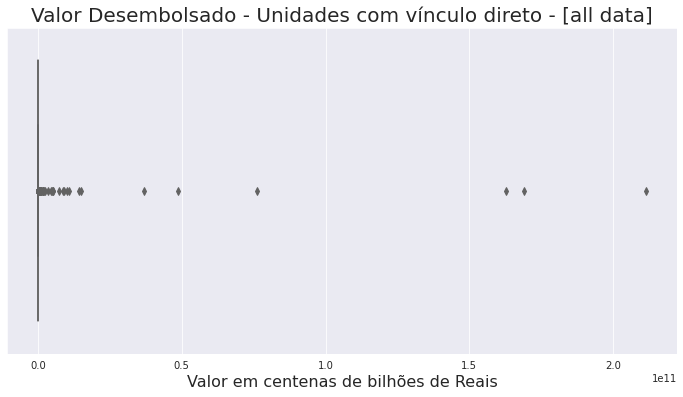

In [ ]:
# criando uma cópia do df4

df4a = df4.copy() 

# checando outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df4a.Valor_Pago)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Valor Desembolsado - Unidades com vínculo direto - [all data]', fontsize=20)
ax.set_xlabel('Valor em centenas de bilhões de Reais', fontsize=16)

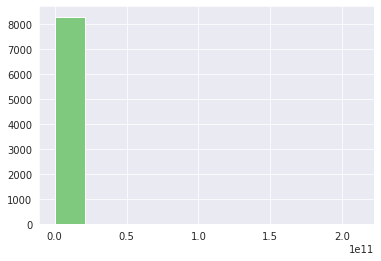

In [ ]:
# plotando o histograma dos valores pagos

df4a.Valor_Pago.hist()
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [ ]:
# removendo outliers

valor = df4a.Valor_Pago

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df4a[ (df4a.Valor_Pago <= limite_superior)].index

df4a.drop(indexNames , inplace=True)

Text(0.5, 0, 'Valor em centenas de bilhões de Reais')

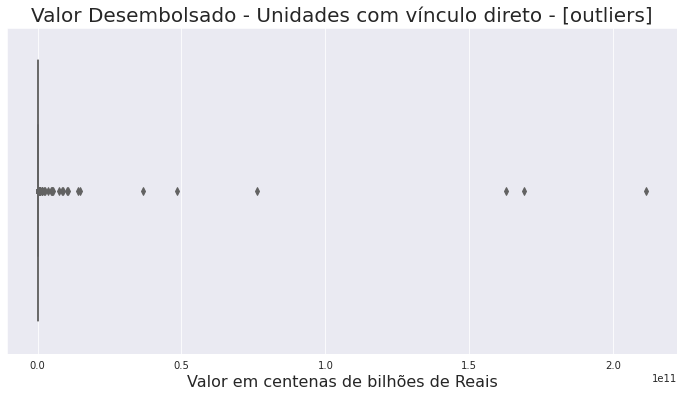

In [ ]:
# checando outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df4a.Valor_Pago)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Valor Desembolsado - Unidades com vínculo direto - [outliers]', fontsize=20)
ax.set_xlabel('Valor em centenas de bilhões de Reais', fontsize=16)

In [ ]:
ah = df4a.groupby("Nome Elemento de Despesa")["Valor_Pago"].sum()
ah.sort_values(ascending=False, inplace=True)
ah

Nome Elemento de Despesa
Principal Corrigido da Dívida Mobiliária Refi    5.486602e+11
Distribuição Constitucional ou Legal de Recei    9.897755e+10
Juros, Deságios e Descontos da Dívida Mobiliá    9.339712e+10
Principal da Dívida Mobiliária Resgatado         7.629420e+10
COMPENSACOES A REGIMES DE PREVIDENCIA            3.096090e+09
Aposentadorias do RPPS, Reserva Remunerada e     2.961379e+09
Vencimentos e Vantagens Fixas - Pessoal Civil    2.753010e+09
Pensões do RPPS e do militar                     2.194693e+09
Principal Corrigido da Dívida Contratual Refi    2.155356e+09
Subvenções econômicas                            1.705738e+09
Indenizações e Restituições                      1.462419e+09
Contribuições                                    1.331593e+09
Despesas de Exercícios Anteriores                1.008660e+09
Juros sobre a Dívida por Contrato                7.880895e+08
Obrigações Patronais                             6.620904e+08
Concessão de Empréstimos e Financiamentos    

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Elemento de Despesa

soma = 0

for i,row in ah.iteritems():
  soma += row

curva_a = 0

for j,row2 in ah.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  741034880355.09 
Equivalente a  88 % do total.
Que engloba até o Juros, Deságios e Descontos da Dívida Mobiliá


In [ ]:
df4a.sort_values(by=['Valor_Pago'], ascending=False).head(7)

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor_Empenhado,Valor_Liquidado,Valor_Pago,Valor_Restos_a_Pagar_Inscritos,Valor_Restos_a_Pagar_Cancelado,Valor_Restos_a_Pagar_Pagos
104827,2022/03,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170600,COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA,1.0,TESOURO NACIONAL,75101,...,76,Principal Corrigido da Dívida Mobiliária Refi,90,Reserva de Contingência,1.650100e+11,2.115960e+11,2.115960e+11,0.0,0.0,0.0
164206,2022/04,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170600,COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA,1.0,TESOURO NACIONAL,75101,...,76,Principal Corrigido da Dívida Mobiliária Refi,90,Reserva de Contingência,1.260000e+09,1.689640e+11,1.689640e+11,0.0,0.0,0.0
7019,2022/01,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170600,COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA,1.0,TESOURO NACIONAL,75101,...,76,Principal Corrigido da Dívida Mobiliária Refi,90,Reserva de Contingência,1.830310e+11,1.629110e+11,1.629110e+11,0.0,0.0,0.0
119512,2022/03,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170600,COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA,1.0,TESOURO NACIONAL,75101,...,72,Principal da Dívida Mobiliária Resgatado,90,Reserva de Contingência,0.000000e+00,7.629420e+10,7.629420e+10,0.0,0.0,0.0
5820,2022/01,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170600,COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA,1.0,TESOURO NACIONAL,75101,...,23,"Juros, Deságios e Descontos da Dívida Mobiliá",90,Reserva de Contingência,5.300200e+10,4.857731e+10,4.857731e+10,0.0,0.0,0.0
48815,2022/02,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170600,COORD.GERAL DE CONTROLE DA DIVIDA PUBLICA,1.0,TESOURO NACIONAL,75101,...,23,"Juros, Deságios e Descontos da Dívida Mobiliá",90,Reserva de Contingência,3.930000e+10,3.669981e+10,3.669981e+10,0.0,0.0,0.0
68716,2022/02,25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo ...,170860,COORD. ANALISE E INF TRANS FIN INTERGOV/STN,1.0,TESOURO NACIONAL,73108,...,81,Distribuição Constitucional ou Legal de Recei,40,Transferências a Municípios,1.469691e+10,1.477512e+10,1.477512e+10,0.0,0.0,0.0


In [ ]:
df4a.groupby(['Nome Elemento de Despesa'])['Valor_Pago'].agg(['max','min','mean','median'])

,max,min,mean,median
Nome Elemento de Despesa,,,,
"Aposentadorias do RPPS, Reserva Remunerada e",4.119776e+08,6.337757e+04,3.567927e+07,9.586691e+06
Auxílio-Alimentação,7.893931e+06,1.429020e+05,2.906395e+06,2.639225e+06
Auxílio-Fardamento,1.499250e+05,6.962538e+04,1.126789e+05,1.184862e+05
Auxílio-Transporte,3.716392e+05,6.923396e+04,1.983630e+05,1.380695e+05
COMPENSACOES A REGIMES DE PREVIDENCIA,1.554300e+09,4.412000e+08,7.740225e+08,5.502950e+08
Concessão de Empréstimos e Financiamentos,1.900000e+08,7.500000e+06,7.287000e+07,2.611000e+07
Contratação por Tempo Determinado,3.213069e+06,7.328000e+04,9.807026e+05,5.872082e+05
Contribuição a Entidades Fechadas de Previdên,3.748981e+06,1.306224e+06,2.127730e+06,1.719132e+06
Contribuições,2.500000e+08,1.186738e+05,1.109661e+08,8.232274e+07


>"Análise das 'Unidades com vínculo direto', por Nome Elemento de Despesa": 

>>6 transações são os principais outliers, totalizando 705 bilhões de Reais (84% de todos os gastos do Ministério da Economia), sendo:

>>>*Principal Corrigido da Dívida Mobiliária Refi: 3 transações, somando 543 bilhões (77%). Comparando com a média de 55 bilhões, há uma 'oportunidade' de fraude a ser investigada, com potencial de 126 bilhões de Reais!

>>>*Juros, Deságios e Descontos da Dívida Mobiliá: 1 transação de 86 bilhões (12%). Comparando com a média de 9,3 bilhões, há uma 'oportunidade' de fraude a ser investigada, com potencial de 34 bilhões de Reais!

>>>*Principal da Dívida Mobiliária Resgatado: 2 transações, somando 76 bilhões (11%), que está consistente com a avaliação estatística.


<hr></hr>

#### <font color='blue'>5.4.2 Analisar com ferramentas estatísticas as oportunidades encontradas no Ministério do Trabalho

##### <font color='blue'>5.4.2.1 Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Elemento de Despesa

Text(0.5, 0, 'Valor em dezenas de bilhões de Reais')

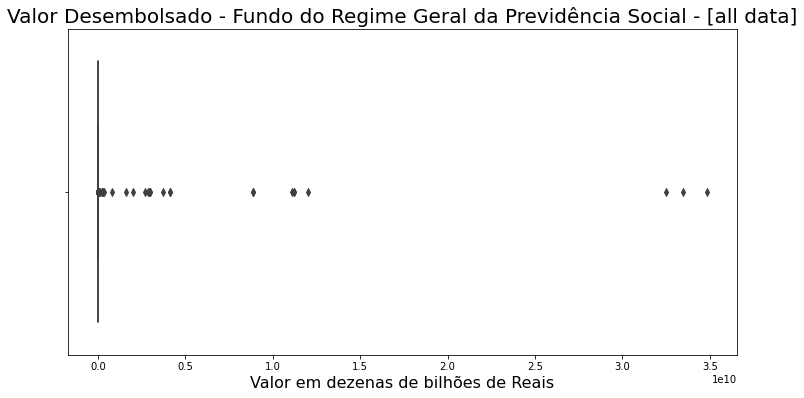

In [ ]:
# criando uma cópia do df6

df6a = df6.copy() 

# checando outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df6a.Valor_Pago)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Valor Desembolsado - Fundo do Regime Geral da Previdência Social - [all data]', fontsize=20)
ax.set_xlabel('Valor em dezenas de bilhões de Reais', fontsize=16)

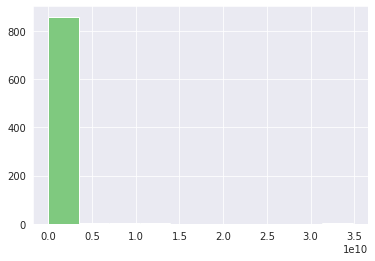

In [ ]:
# plotando o histograma dos valores pagos

df6a.Valor_Pago.hist()
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [ ]:
# removendo outliers

valor = df6a.Valor_Pago

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df6a[ (df6a.Valor_Pago <= limite_superior)].index

df6a.drop(indexNames , inplace=True)

Text(0.5, 0, 'Valor em dezenas de bilhões de Reais')

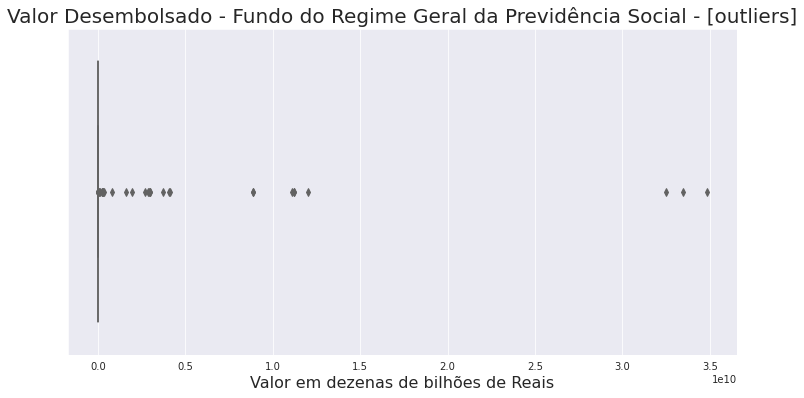

In [ ]:
# checando outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df6a.Valor_Pago)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Valor Desembolsado - Fundo do Regime Geral da Previdência Social - [outliers]', fontsize=20)
ax.set_xlabel('Valor em dezenas de bilhões de Reais', fontsize=16)

In [ ]:
af = df6a.groupby("Nome Elemento de Despesa")["Valor_Pago"].sum()
af.sort_values(ascending=False, inplace=True)
af

Nome Elemento de Despesa
Aposentadorias do RGPS - Área Urbana       1.048921e+11
Pensões do RGPS - Área Urbana              3.632256e+10
Aposentadorias do RGPS - Área Rural        3.306164e+10
Pensões do RGPS - Área Rural               1.127537e+10
Outros Benefícios do RGPS - Área Urbana    9.243508e+09
Outros Benefícios do RGPS - Área Rural     8.966845e+08
Indenizações e Restituições                5.375100e+08
Sentenças Judiciais                        2.800061e+08
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Elemento de Despesa

soma = 0

for i,row in af.iteritems():
  soma += row

curva_a = 0

for j,row2 in af.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  174276301944.0 
Equivalente a  89 % do total.
Que engloba até o Aposentadorias do RGPS - Área Rural


In [ ]:
df6a.sort_values(by=['Valor_Pago'], ascending=False).head(7)

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor_Empenhado,Valor_Liquidado,Valor_Pago,Valor_Restos_a_Pagar_Inscritos,Valor_Restos_a_Pagar_Cancelado,Valor_Restos_a_Pagar_Pagos
147514,2022/04,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,54,Aposentadorias do RGPS - Área Urbana,90,Reserva de Contingência,5.526581e+10,4.899657e+10,3.482190e+10,0.0,0.0,0.0
134543,2022/03,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,54,Aposentadorias do RGPS - Área Urbana,90,Reserva de Contingência,1.286460e+11,3.312738e+10,3.348746e+10,0.0,0.0,0.0
81850,2022/02,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,54,Aposentadorias do RGPS - Área Urbana,90,Reserva de Contingência,1.900000e+10,3.299566e+10,3.247205e+10,0.0,0.0,0.0
201554,2022/04,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,56,Pensões do RGPS - Área Urbana,90,Reserva de Contingência,1.775891e+10,1.645437e+10,1.202928e+10,0.0,0.0,0.0
198152,2022/04,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,53,Aposentadorias do RGPS - Área Rural,90,Reserva de Contingência,0.000000e+00,1.322133e+10,1.123025e+10,0.0,0.0,0.0
137956,2022/03,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,56,Pensões do RGPS - Área Urbana,90,Reserva de Contingência,-4.000000e+09,1.119885e+10,1.120902e+10,0.0,0.0,0.0
70260,2022/02,40000,Ministério do Trabalho,37904,Fundo do Regime Geral da Previdência Social,513001,COORDENACAO DE ORCAMENTO E FINANCAS DO FRGPS,57904.0,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,40904,...,56,Pensões do RGPS - Área Urbana,90,Reserva de Contingência,-1.900000e+10,1.118402e+10,1.111111e+10,0.0,0.0,0.0


In [ ]:
df6a.groupby(['Nome Elemento de Despesa'])['Valor_Pago'].agg(['max','min','mean','median'])

,max,min,mean,median
Nome Elemento de Despesa,,,,
Aposentadorias do RGPS - Área Rural,1.123025e+10,4.090627e+09,8.265409e+09,8.870379e+09
Aposentadorias do RGPS - Área Urbana,3.482190e+10,4.110693e+09,2.622303e+10,3.297976e+10
Indenizações e Restituições,3.219926e+08,2.155173e+08,2.687550e+08,2.687550e+08
Outros Benefícios do RGPS - Área Rural,2.815102e+08,1.355869e+08,2.241711e+08,2.397937e+08
Outros Benefícios do RGPS - Área Urbana,2.909672e+09,1.329827e+05,1.155439e+09,3.972458e+08
Pensões do RGPS - Área Rural,3.733413e+09,1.580716e+09,2.818841e+09,2.980618e+09
Pensões do RGPS - Área Urbana,1.202928e+10,1.973148e+09,9.080640e+09,1.116006e+10
Sentenças Judiciais,3.343314e+07,1.318105e+05,2.545510e+06,4.463741e+05


>"Análise do 'Fundo do Regime Geral da Previdência Social', por Nome Elemento de Despesa": 
>>3 transações são os principais outliers, totalizando 100 bilhões de Reais totais, ou seja, comparando-se com a média de 79 bilhões de Reais, há uma 'oportunidade' de fraude a ser investigada, com potencial de 21 bilhões de Reais!
<hr></hr>

##### <font color='blue'>5.4.2.2 Análise do 'Fundo de Amparo ao Trabalhador', por Nome Elemento de Despesa

Text(0.5, 0, 'Valor em dezenas de bilhões de Reais')

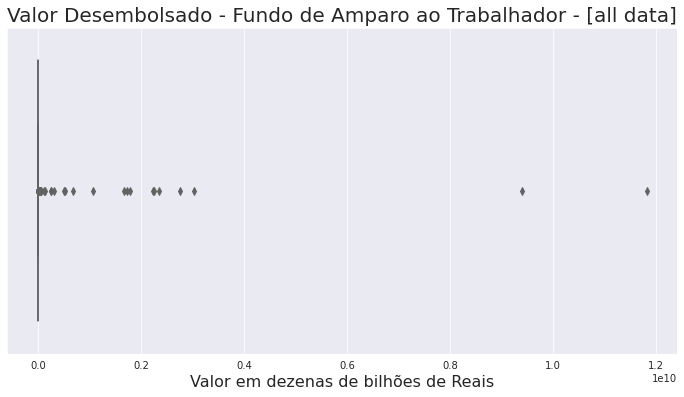

In [ ]:
# criando uma cópia do df7

df7a = df7.copy() 

# checando outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df7a.Valor_Pago)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Valor Desembolsado - Fundo de Amparo ao Trabalhador - [all data]', fontsize=20)
ax.set_xlabel('Valor em dezenas de bilhões de Reais', fontsize=16)

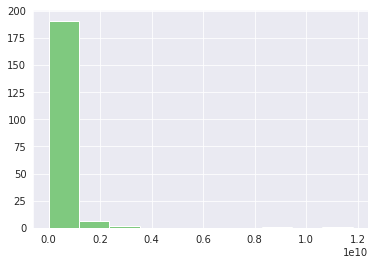

In [ ]:
# plotando o histograma dos valores pagos

df7a.Valor_Pago.hist()
sns.set_palette('Accent')
sns.set_style('darkgrid')

In [ ]:
# removendo outliers

valor = df7a.Valor_Pago

Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

indexNames = df7a[ (df7a.Valor_Pago <= limite_superior)].index

df7a.drop(indexNames , inplace=True)

Text(0.5, 0, 'Valor em dezenas de bilhões de Reais')

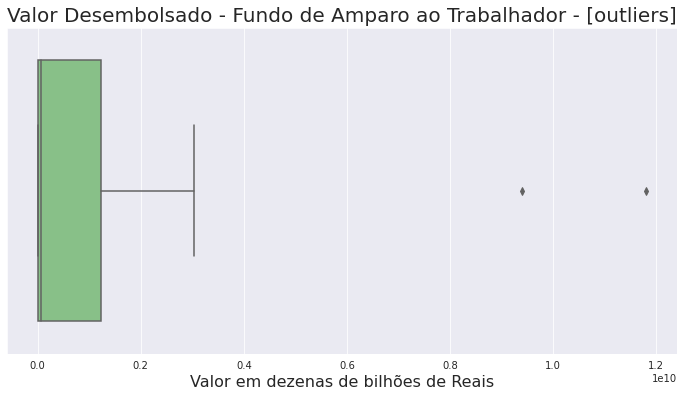

In [ ]:
# checando outliers

plt.figure(figsize=(12,6))
ax = sns.boxplot(x = df7a.Valor_Pago)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax.set_title('Valor Desembolsado - Fundo de Amparo ao Trabalhador - [outliers]', fontsize=20)
ax.set_xlabel('Valor em dezenas de bilhões de Reais', fontsize=16)

In [ ]:
ag = df7a.groupby("Nome Elemento de Despesa")["Valor_Pago"].sum()
ag.sort_values(ascending=False, inplace=True)
ag

Nome Elemento de Despesa
Seguro Desemprego e Abono Salarial               3.565420e+10
Concessão de Empréstimos e Financiamentos        7.556215e+09
Outros Serviços de Terceiros - Pessoa Jurídic    4.581391e+05
Outros Serviços de Terceiros - Pessoa Física     6.310866e+04
Obrigações Tributárias e Contributivas           4.324559e+04
Name: Valor_Pago, dtype: float64

In [ ]:
# cálculo da curva A do Órgão Subordinado, por Nome Elemento de Despesa

soma = 0

for i,row in ag.iteritems():
  soma += row

curva_a = 0

for j,row2 in ag.iteritems():
  curva_a += row2
  if curva_a > (0.8 * soma):
    break

print('O montante equivalente da curva A é: ', curva_a, '\nEquivalente a ', round(curva_a / soma * 100), '% do total.\nQue engloba até o', j)

O montante equivalente da curva A é:  35654195663.26 
Equivalente a  83 % do total.
Que engloba até o Seguro Desemprego e Abono Salarial


In [ ]:
df7a.sort_values(by=['Valor_Pago'], ascending=False).head(3)

,Ano e mês do lançamento,Código Órgão Superior,Nome Órgão Superior,Código Órgão Subordinado,Nome Órgão Subordinado,Código Unidade Gestora,Nome Unidade Gestora,Código Gestão,Nome Gestão,Código Unidade Orçamentária,...,Código Elemento de Despesa,Nome Elemento de Despesa,Código Modalidade da Despesa,Modalidade da Despesa,Valor_Empenhado,Valor_Liquidado,Valor_Pago,Valor_Restos_a_Pagar_Inscritos,Valor_Restos_a_Pagar_Cancelado,Valor_Restos_a_Pagar_Pagos
88042,2022/03,40000,Ministério do Trabalho,38901,Fundo de Amparo ao Trabalhador,380916,COORD-GERAL DE RECURSOS DO FAT - CGFAT,1.0,TESOURO NACIONAL,40901,...,10,Seguro Desemprego e Abono Salarial,90,Reserva de Contingência,1.181372e+10,1.181372e+10,1.181372e+10,0.0,0.0,0.0
78988,2022/02,40000,Ministério do Trabalho,38901,Fundo de Amparo ao Trabalhador,380916,COORD-GERAL DE RECURSOS DO FAT - CGFAT,1.0,TESOURO NACIONAL,40901,...,10,Seguro Desemprego e Abono Salarial,90,Reserva de Contingência,9.402151e+09,9.402151e+09,9.402151e+09,0.0,0.0,0.0
101390,2022/03,40000,Ministério do Trabalho,38901,Fundo de Amparo ao Trabalhador,380916,COORD-GERAL DE RECURSOS DO FAT - CGFAT,1.0,TESOURO NACIONAL,40901,...,10,Seguro Desemprego e Abono Salarial,90,Reserva de Contingência,3.031467e+09,3.031467e+09,3.031467e+09,0.0,0.0,0.0


In [ ]:
df7a.groupby(['Nome Elemento de Despesa'])['Valor_Pago'].agg(['max','min','mean','median'])

,max,min,mean,median
Nome Elemento de Despesa,,,,
Concessão de Empréstimos e Financiamentos,2.240363e+09,1.226653e+08,1.511243e+09,1.724719e+09
Obrigações Tributárias e Contributivas,4.324559e+04,4.324559e+04,4.324559e+04,4.324559e+04
Outros Serviços de Terceiros - Pessoa Física,6.310866e+04,6.310866e+04,6.310866e+04,6.310866e+04
Outros Serviços de Terceiros - Pessoa Jurídic,1.708641e+05,5.081605e+04,1.145348e+05,1.182295e+05
Seguro Desemprego e Abono Salarial,1.181372e+10,9.332400e+04,1.229455e+09,6.163999e+07


>"Análise do 'Fundo de Amparo ao Trabalhador', por Nome Elemento de Despesa": 
>>3 transações são os principais outliers, totalizando 24 bilhões de Reais totais, ou seja, comparando-se com a média de 4 bilhões de Reais, há uma 'oportunidade' de fraude a ser investigada, com potencial de 20 bilhões de Reais!
<hr></hr>

##<font color='blue' style='font-size: 30px;'>6.   Conclusão</font>

Análise referente ao aprofundamento dos gastos do **Governo Federal**, no período de **Janeiro a Abril de 2022**:

> Referente ao **Ministério da Economia** (dono de gastos da ordem de **844 bilhões de Reais**), há 2 situações de destaque: **5 transações** são os principais outliers, totalizando **629 bilhões** de Reais (75% de todos os gastos do Ministério da Economia), sendo:

>>Principal Corrigido da Dívida Mobiliária Refi: **3 transações**, somando **543 bilhões de Reais** (77%). Comparando com a média de 55 bilhões, há uma 'oportunidade' de fraude a ser investigada, com potencial de **126 bilhões de Reais**!

>>Juros, Deságios e Descontos da Dívida Mobiliá: **2 transações** de **86 bilhões de Reais** (12%). Comparando com a média de 9,3 bilhões, há uma 'oportunidade' de fraude a ser investigada, com potencial de **34 bilhões de Reais**!


> Já quanto ao **Ministério do Trabalho** (responsável pelos gastos de mais de **264 bilhões de Reais**), foi possível estratificar 2 situações interessantes:

>>O *fundo do regime geral da Previdência Social* consome **196 bilhões de Reais** (74% dos 264 bilhões)
>>>Nesse caso, foi possível identificar **3 transações** outliers, totalizando **100 bilhões de Reais**, ou seja, comparando-se com a média de 79 bilhões de Reais, há uma *oportunidade de fraude* a ser investigada, com potencial de **21 bilhões de Reais!**


>>O *fundo de amparo ao trabalhador*, outros **43 bilhões de Reais** (ou 16% dos 264 bi)
>>>Nesse outro caso, **3 transações** são os principais outliers, totalizando **24 bilhões de Reais**, ou seja, comparando-se com a média de 4 bilhões de Reais, há uma *oportunidade de fraude* a ser investigada, com potencial de **20 bilhões de Reais!**

Em resumo, dos **1,27 trilhão de Reais** gastos pelo Governo Federal no período, foram avaliados **2 ministérios** (Economia e Trabalho), que perfazem **1,11 trilhão de Reais (87%)** dos gastos totais do Tesouro.

Destes, apenas **11 transações** têm potencial de revelar **200 bilhões de Reais** (16%) em *possíveis fraudes* ao erário. É necessário, pois, investigar!

Fim.

Elaborado pelo Eng. William Mazza

Maio de 2022

<hr></hr>